# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Pada saat kelas 12, siswa akan dihadapkan dengan dua pilihan, apakah akan lanjut bekerja atau
ke perguruan tinggi. Jika siswa tersebut lulus dari SMA, belum tentu siswa tersebut akan melanjutkan
ke perguruan tinggi. Begitu pun dengan siswa yang lulus dari SMK belum tentu akan melanjutkan bekerja.
Dataset ini berisi data siswa yang akan diprediksi apakah siswa tersebut akan melanjutkan ke perguruan
tinggi atau tidak.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset)
bertujuan untuk memprediksi dan menganalisis apakah siswa akan melanjutkan ke perguruan tinggi
atau tidak. Ini akan membantu pihak sekolah dalam menuntun siswanya dalam melanjutkan karirnya
di perguruan tinggi atau bekerja.

In [ ]:
Data Understanding

type_school : tipe sekolah apakah SMA atau SMK
school_accreditation : akreditasi sekolah
gender : jenis kelamin sekolah
interest : tingkat ketertatikan siswa untuk melanjutkan ke perguruan tinggi
residence : jenis tempat tinggal yang didiami oleh siswa
parent_age : usia orangtua
parent_salary : gaji orangtua
house_area : luas rumah
average_grades : nilai rata-rata dari siswa tersebut
parent_was_in_college : apakah orangtua dari siswa tersebut pernah kuliah
will_go_to_college : apakah siswa akan melanjutkan ke perguruan tinggi atau tidak

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [5]:
# memisahkan independen dengan dependen

indp = [col for col in df.columns != 'will_go_to_college']
dfn = 'will_go_to_college'

In [6]:
# memisahkan numerik dan kategori
numerik = []
kategori = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerik.append(col)
    elif df[col].dtype == 'float64':
        numerik.append(col)
    elif df[col].dtype == 'bool':
        kategori.append(col)
    else:
        kategori.append(col)

for col in df.columns:
    if col in numerik:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
numerik

['parent_age', 'parent_salary', 'house_area', 'average_grades']

In [8]:
kategori

['type_school',
 'school_accreditation',
 'gender',
 'interest',
 'residence',
 'parent_was_in_college',
 'will_go_to_college']

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori:
    df[col] = le.fit_transform(df[col])

In [10]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,1,1,1,56,6950000,83.0,84.09,0,1
1,0,0,1,1,1,57,4410000,76.8,86.91,0,1
2,0,1,0,4,1,50,6500000,80.6,87.43,0,1
3,1,1,1,4,0,49,6600000,78.2,82.12,1,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0,0


In [11]:
df.to_csv('college.csv')

# Data Preparation

In [ ]:
Data Preparation

Yang menjadi fitur dalam dataset ini :

type_school
school_accreditation
gender
interest
residence
parent_age
parent_salary 
house_area
average_grades
parent_was_in_college

Yang menjadi target yaitu will_go_to_college

### Split data

In [12]:
X = df.drop(columns=['will_go_to_college'], axis=1)
Y = df['will_go_to_college']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, x_train.shape, x_test.shape)

(1000, 10) (800, 10) (200, 10)


# Modeling

### Membuat model training

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

In [18]:
model = decision.fit(x_train, y_train)

# Evaluation

### Evaluasi model

In [19]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [21]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.86


In [22]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [23]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.79


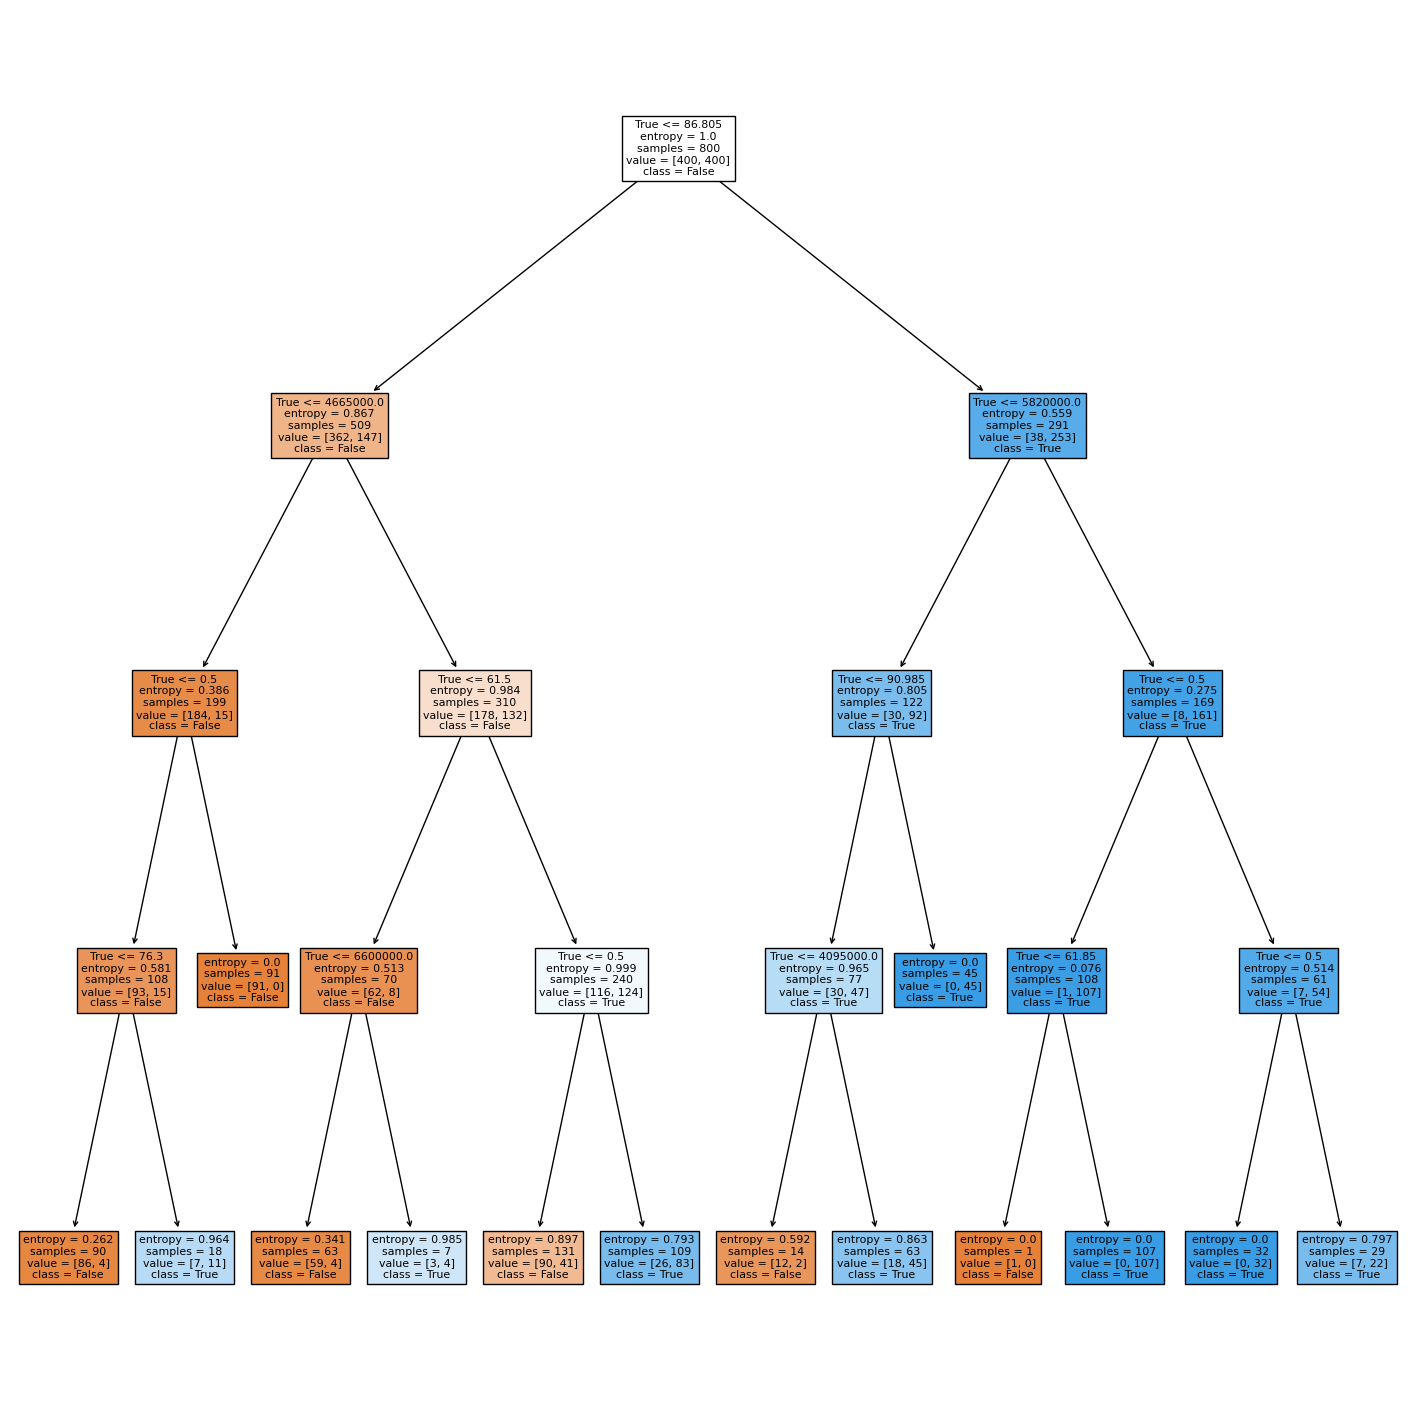

In [25]:
fig = plt.figure(figsize=(18, 18))
_ = tree.plot_tree(
    model,
    feature_names = indp,
    class_names = ['False', 'True'],
    filled = True)

# Model Prediksi

In [29]:
input_data = (1,1,0,1,0,48,3770000,65.3,86.79,1)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predik = model.predict(data_reshaped)
print(predik)

if (predik[0] == 0):
    print('Siswa tersebut tidak melanjutkan ke perkuliahan')
else:
    print('Siswa tersebut melanjutkan ke perkuliahan')

[0]
Siswa tersebut tidak melanjutkan ke perkuliahan


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Deployment

### Save Model

In [30]:
import pickle

filename = 'kampus.sav'
pickle.dump(model, open(filename, 'wb'))